#### **Import modules**

In [4]:
from typing import List

import pandas as pd
import seaborn as sns
from gensim.models import Word2Vec
from matplotlib import pyplot as plt
from nltk.tokenize import sent_tokenize
from sklearn.decomposition import PCA

from utils import GeorgianWord2VecModel, GeorgianFastTextModel

#### **Init word2vec model**

In [5]:
texts = [["გამარჯობა", "როგორ", "ხარ?"], ["რავი", "კარგად", "შენ?"]]

model = Word2Vec(sentences=texts, vector_size=100, window=5, min_count=1, workers=4)

model.save("word2vec.model")

## **Convert file into input format**

word2vec model gets list of list of strings as an input

In [6]:
def convert_file_into_input(file_path: str) -> List[List[str]]:
    # sentences_split_regex = "\. |!|\?"
    with open(file_path, 'r') as f:
        data = f.read()

    sentences = sent_tokenize(data)
    print(sentences)
    return [[word.strip() for word in sentence.split(" ")] for sentence in sentences]

In [7]:
data = convert_file_into_input("../data/data2.txt")

['ედუარდ შევარდნაძე \nედუარდ ამბროსის ძე შევარდნაძე (დ.', '25 იანვარი, 1928, სოფელი მამათი, ოზურგეთის მაზრა, საქართველოს სსრ — გ.', '7 ივლისი, 2014, თბილისი, საქართველო) — ქართველი პოლიტიკოსი და სახელმწიფო მოღვაწე.', '1972-1985 წლებში საქართველოს სსრ-ის კომპარტიის ცკ-ს პირველი მდივანი, 1985-1990 წლებში საბჭოთა კავშირის საგარეო საქმეთა მინისტრი, 1995–2003 წლებში საქართველოს პრეზიდენტი.', 'იყო სსრკ-ის IX-XI მოწვევების უმაღლესი საბჭოს დეპუტატი.', 'სოციალისტური შრომის გმირი (1981), სკკპ ცკ-ის პოლიტბიუროს წევრობის კანდიდატი (1978), წევრი 1985 წლის ივლისიდან.', '1964–1965 წლებში იყო საზოგადოებრივი წესრიგის დაცვის მინისტრის მოადგილე.', '1965–1972 წლებში საქართველოს სსრ შინაგან საქმეთა მინისტრი.', '1985 წელს შევარდნაძე სსრკ-ის საგარეო საქმეთა მინისტრად დაინიშნა.', '1990 წელს იგი გადადგა.', '1991 წელს მიხეილ გორბაჩოვის მიწვევით კვლავ დაუბრუნდა მინისტრის პოსტს.', '1992 წელს საქართველოს სახელმწიფო საბჭოს ხელმძღვანელი, 1992–1995 წლებში საქართველოს რესპუბლიკის პარლამენტის თავმჯდომარე.', 'მონაწილეობ

### Create and test GeorgianWord2VecModel

In [8]:
word2vec_model = GeorgianWord2VecModel()

Initializing data
Model created!


In [17]:
word2vec_model.train("../data/data2.txt")

In [18]:
word2vec_model.get_vector("ედუარდ")

array([ 7.9563837e-03, -4.3582721e-03, -1.0310900e-03,  1.3878180e-03,
       -1.6385510e-04,  1.0943214e-03,  6.0409987e-03,  3.5455890e-04,
       -3.4003078e-03, -1.6780909e-03,  5.7516182e-03,  1.2462898e-03,
       -6.3921139e-04,  9.5046302e-03, -5.0360588e-03, -7.9375517e-04,
        9.1585470e-03,  6.5377657e-03,  1.6617867e-03, -8.9480150e-03,
        1.1300918e-03, -2.1689741e-03,  9.4464663e-03,  9.6041407e-04,
        1.4683133e-03,  2.3934594e-03, -2.1383187e-03, -5.3329030e-03,
        1.6266006e-04, -1.8844632e-03,  6.6987118e-03,  9.0708835e-03,
       -7.1404269e-04,  2.9164471e-03, -6.2085497e-03,  1.9473757e-03,
       -7.1806642e-03, -8.8954279e-03, -6.1821248e-03, -9.4287032e-03,
        7.3424713e-03, -5.8337282e-03,  8.3006332e-03, -7.2161872e-03,
        3.4001132e-03,  9.6419584e-03, -8.0843037e-03, -1.0021447e-02,
       -4.2699487e-03, -2.6194865e-03, -1.4921249e-04, -9.0569817e-03,
       -8.6811595e-03,  2.9357856e-03, -8.4666722e-03, -8.8539822e-03,
      

In [19]:
model = word2vec_model.get_model()


def get_df_from_model(model: Word2Vec) -> pd.DataFrame:
    vectors = model.wv.vectors
    words = model.wv.index_to_key
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(vectors)

    words = pd.DataFrame(words)
    pca_result = pd.DataFrame(pca_result)
    pca_result['x_values'] = pca_result.iloc[0:, 0]
    pca_result['y_values'] = pca_result.iloc[0:, 1]
    pca_final = pd.merge(words, pca_result, left_index=True, right_index=True)
    pca_final['word'] = pca_final.iloc[0:, 0]
    result = pca_final[['word', 'x_values', 'y_values']]

    return result


pca_data = get_df_from_model(model)

pca_data

word  x_values  y_values
0                    შენ? -0.001282  0.002415
1                  კარგად -0.018721 -0.002205
2                    რავი  0.005812 -0.005494
3                    ხარ? -0.001520  0.001786
4                   როგორ -0.007412 -0.010343
..                    ...       ...       ...
930  ვერხნიაია-მანუილოვკა -0.002395  0.006099
931  ვერხნიაია-ჟუჟმანოვკა  0.004052  0.015870
932              ვიაზოვკა  0.005016  0.000526
933    ვისოკაია-ვაკულოვკა  0.023324  0.007361
934                ვოლნოე  0.003404  0.006374

[935 rows x 3 columns]

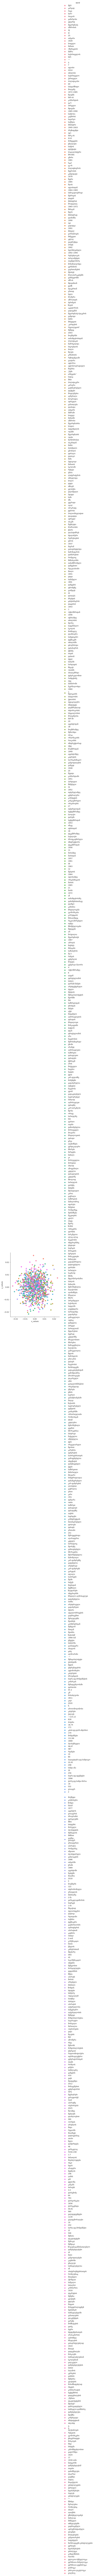

In [20]:
sns.set_style('ticks')

fig = sns.lmplot(x='x_values', y='y_values',
                 data=pca_data,
                 fit_reg=False,
                 legend=True,
                 hue='word')

fig = plt.gcf()
fig.set_size_inches(8, 6)
plt.show()

In [13]:
fasttext_model = GeorgianFastTextModel()
fasttext_model.train("../data/data2.txt")

fasttext_model.get_vector("ედუარდ")

Initializing data
Model created!


array([-1.2136707e-03,  6.0084695e-04, -1.1561227e-03,  1.9938566e-03,
        4.6846084e-04,  6.1979319e-04,  1.0442958e-03,  1.3081008e-03,
       -9.7842258e-04,  8.5047074e-04, -2.4927288e-04, -7.6874997e-04,
       -1.5242551e-03, -1.7286871e-03,  3.2954270e-04,  1.4605847e-03,
       -3.0354445e-04,  9.1210334e-04,  1.0175615e-03,  1.2371832e-03,
        7.0957682e-04, -4.9081858e-04, -5.6365278e-04,  8.5505960e-04,
        2.4666986e-03,  1.4507445e-04, -8.7846001e-04, -2.9423691e-03,
        6.7657960e-04,  1.0684886e-03,  1.7701918e-03,  4.6306534e-04,
       -2.6849096e-03,  1.8730464e-03,  7.1972120e-04,  5.0287740e-04,
       -3.8268763e-04,  7.9305988e-04,  1.8607642e-04,  8.7478591e-05,
        8.2632172e-04, -9.3808223e-05,  1.7975374e-03, -6.7557953e-04,
        8.2681672e-06,  2.7929675e-03, -1.5778800e-03, -1.5257004e-03,
        1.8520392e-03,  3.0231406e-04,  9.5003395e-04,  6.1179063e-04,
       -2.6298250e-04,  5.2571530e-04,  5.4744649e-04,  8.8955521e-06,
      

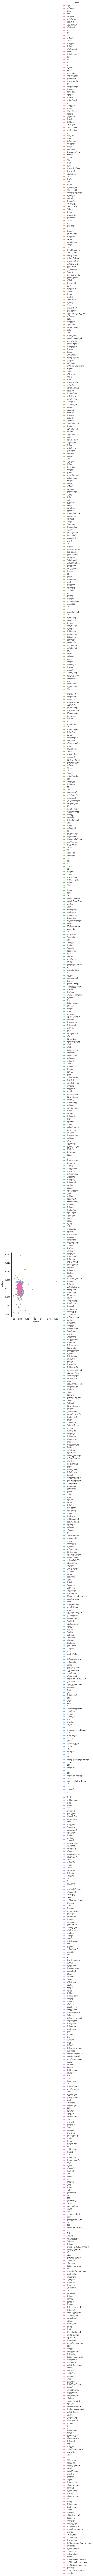

In [14]:
pca_data = get_df_from_model(fasttext_model.get_model())

fig = sns.lmplot(x='x_values', y='y_values',
                 data=pca_data,
                 fit_reg=False,
                 legend=True,
                 hue='word')

fig = plt.gcf()
fig.set_size_inches(8, 6)
plt.show()


In [15]:
model = fasttext_model.get_model()

model.wv.get_vector("rame_jandaba")

array([ 6.5449026e-04,  1.3997619e-03,  3.5183609e-04, -1.2912027e-03,
        5.2582647e-04, -8.8980794e-04,  1.1477305e-03, -1.9915018e-03,
        4.3083378e-04,  6.8961352e-04,  2.3012550e-04, -6.5838749e-04,
       -1.7117325e-04, -1.1588782e-03, -1.0086633e-03,  2.0254722e-04,
       -9.5512613e-04,  5.4069707e-04,  3.1220398e-04,  1.3538586e-03,
       -3.9063752e-04,  4.2921416e-05,  2.0046860e-03,  4.7424878e-04,
        8.0862541e-05, -7.0861791e-04,  4.1791203e-04,  1.8858258e-04,
       -3.3784981e-04, -4.2989547e-04, -1.5377051e-04,  2.6175965e-04,
        1.1330800e-03, -8.9291803e-05, -6.2411919e-04,  3.8202963e-04,
       -7.3365250e-04,  1.3935426e-03,  2.5811468e-04,  3.6054083e-05,
       -1.5469489e-04,  3.9627624e-04, -1.6115201e-04, -9.5334479e-05,
        9.5187640e-04,  4.2028827e-04, -1.0755451e-03, -1.2869716e-03,
        4.3406626e-04,  8.8715582e-04,  6.2966417e-04,  4.7967132e-04,
       -5.9750286e-04, -4.4536812e-04,  1.1998104e-03,  2.7028614e-04,
      

In [16]:
print("((12())".strip("(").strip(")"))

12(
